# Init

In [4]:
import numpy as np

import awkward as ak
import uproot as uproot

import matplotlib.pyplot as plt
import seaborn as sns

import pprint as pprint

In [5]:
file_path = "/home/amaterasu/work/cm_meeting_hk/datasets/processed_root_datasets/e_mu_20k_v1_processed.root"

# Use uproot.concatenate to merge data in memory as an Awkward Array
file = uproot.open(file_path)
print(f"File keys :  \n{file.keys()}")

tree_name = 'tree_with_cuts'
tree = file[tree_name]
pprint.pprint(f"Tree keys :  \n{tree.keys()}")

File keys :  
['tree_with_cuts;1']
('Tree keys :  \n'
 "['eventType', 'event_id', 'nb_triggers_in_event', 'trigger_time', "
 "'trigger_type', 'energy', 'vertex', 'vertex_time', 'particleDir', "
 "'particleStart', 'particleStop', 'n_hits', 'n_digits', 'charge', 'time', "
 "'hitx', 'hity', 'hitz']")


# Event level

## Event type

In [6]:
np.unique(tree['eventType'].array(), return_counts=True)

<Array [[11, 13], [19793, 19019]] type='2 * var * int64'>

In [7]:
# Trigger per events
np.unique(tree['nb_triggers_in_event'].array(), return_counts=True)

<Array [[1], [38812]] type='2 * var * int64'>

## Energy

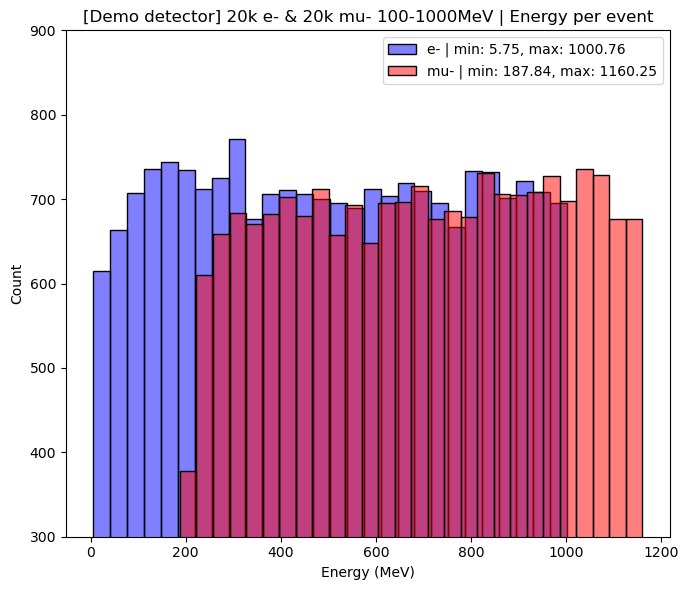

In [8]:
energy = tree['energy'].array()
electron_e = energy[tree['eventType'].array() == 11]
muon_e = energy[tree['eventType'].array() == 13]


fig_title = '[Demo detector] 20k e- & 20k mu- 100-1000MeV | Energy per event'
log_scale=False
alpha=0.5

# Plots nb_hits histograms
plt.figure(figsize=(7, 6))

sns.histplot(electron_e, 
             alpha=alpha,
             log_scale=log_scale,
             label=f'e- | min: {np.min(electron_e):.2f}, max: {np.max(electron_e):.2f}',
             color='blue',
)
sns.histplot(muon_e,
             alpha=alpha,
             log_scale=log_scale,
             label=f"mu- | min: {np.min(muon_e):.2f}, max: {np.max(muon_e):.2f}",
             color='red'
)

plt.ylim([300, 900])
plt.title(fig_title)
plt.xlabel("Energy (MeV)")
plt.legend()

plt.tight_layout()
plt.show()

## Number of hits

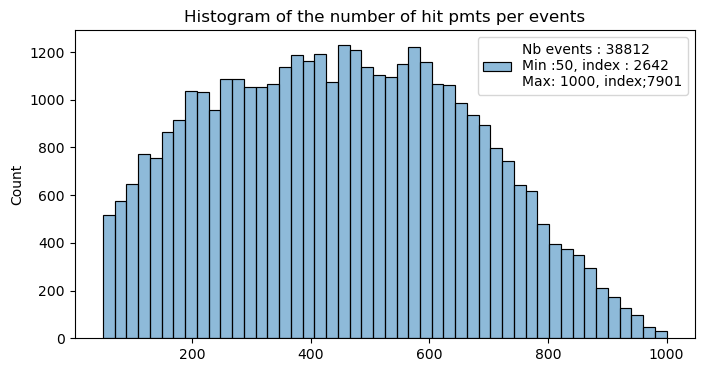

In [9]:
log_scale=False
alpha=0.5


nb_hits = tree['n_hits'].array()
list_nb_hits = [nb_hit for nb_hit in nb_hits] # to use .index on

# Find minimum and maximum values of nb_hits + get the index of associated event
min_value, max_value = min(nb_hits), max(nb_hits)
min_index, max_index = list_nb_hits.index(min_value), list_nb_hits.index(max_value)

# Plots nb_hits histograms
plt.figure(figsize=(8, 4))

plt.title('Histogram of the number of hit pmts per events')
sns.histplot(nb_hits, 
             label=f"Nb events : {len(nb_hits)} \nMin :{min_value}, index : {min_index} \nMax: {max_value}, index;{max_index}",
             alpha=alpha,
             log_scale=log_scale
)

plt.legend()
plt.show()

##  Trigger Time

In [10]:
trigger_time = tree['trigger_time'].array()
np.unique(trigger_time, return_counts=True)

<Array [[0], [3.88e+04]] type='2 * var * float64'>

## Vertices

In [11]:
vertex = tree['vertex'].array()

### -- Position

In [12]:
v_x, v_z, v_y = vertex[:,0].to_numpy(), vertex[:,1].to_numpy(), vertex[:,2].to_numpy()

edges_x, edges_y, edges_z = np.histogram_bin_edges(v_x, bins='auto'), np.histogram_bin_edges(v_y, bins='auto'), np.histogram_bin_edges(v_z, bins='auto')

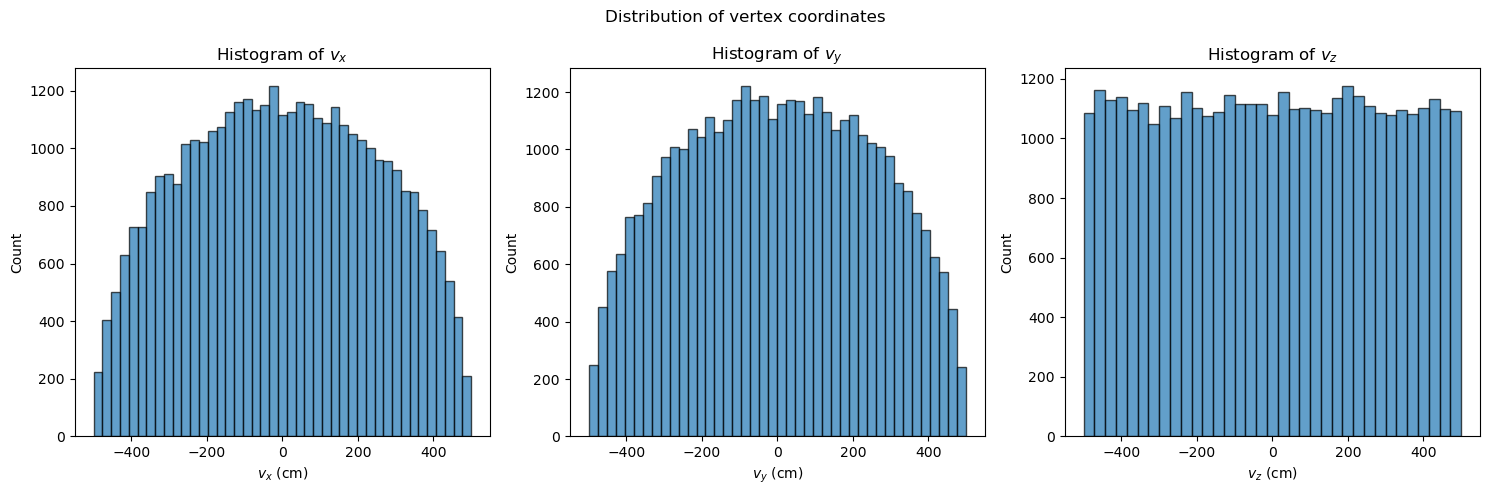

In [13]:
alpha = 0.7


plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
plt.hist(v_x, bins=edges_x, alpha=alpha, edgecolor='black')
plt.xlabel(r'$v_x$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $v_x$')

plt.subplot(1, 3, 2)
plt.hist(v_y, bins=edges_y, alpha=alpha, edgecolor='black')
plt.xlabel(r'$v_y$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $v_y$')

plt.subplot(1, 3, 3)
plt.hist(v_z, bins=edges_z, alpha=alpha, edgecolor='black')
plt.xlabel(r'$v_z$ (cm)')
plt.ylabel('Count')
plt.title(r'Histogram of $v_z$')

plt.suptitle('Distribution of vertex coordinates')
plt.tight_layout()
plt.show()

# PMTs level

## -- Charge

In [14]:
charge = ak.flatten(tree['charge'].array()).to_numpy()

edges_charge = np.histogram_bin_edges(np.log10(charge), bins='auto')
len(edges_charge)

784

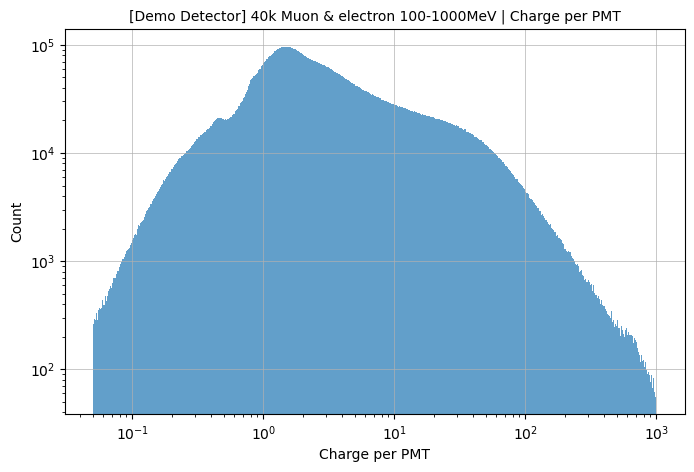

In [15]:
fig_title = '[Demo Detector] 40k Muon & electron 100-1000MeV | Charge per PMT'

figure = plt.figure(figsize=(8, 5))
plt.title(fig_title, fontsize=10)
plt.xlabel('Charge per PMT')
plt.ylabel('Count')

plt.hist(charge, bins=10**edges_charge, alpha=0.7)

plt.xscale('log')
plt.yscale('log')
plt.grid(visible=True, linestyle='-', linewidth=0.7, alpha=0.7) 
plt.show()

## -- Time

In [16]:
time = ak.flatten(tree['time'].array())

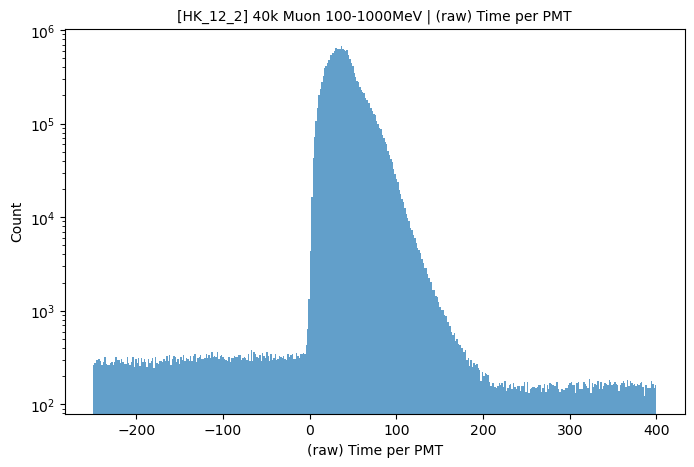

In [17]:
fig_title = '[HK_12_2] 40k Muon 100-1000MeV | (raw) Time per PMT'

figure = plt.figure(figsize=(8, 5))
plt.title(fig_title, fontsize=10)

plt.hist(time, bins=400, alpha=0.7)
plt.xlabel('(raw) Time per PMT')
plt.ylabel('Count')

#plt.xscale('log')
plt.yscale('log')

plt.show()